In [2]:
import pandas as pd

df = pd.read_csv('./data/bike_predictor/hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


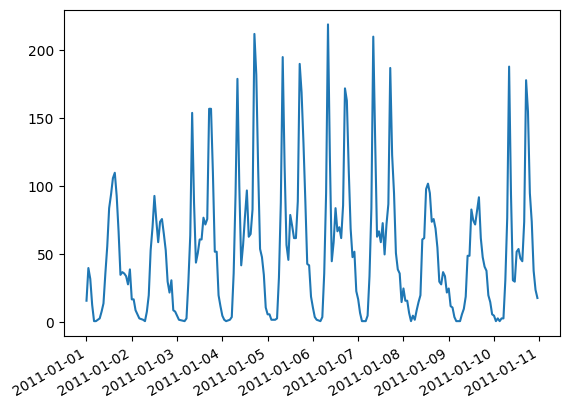

In [10]:
import matplotlib.pyplot as plt

ndf = df[df['dteday'] < '2011-01-11'].copy()
ndf['datetime'] = pd.to_datetime(ndf['dteday']) + pd.to_timedelta(ndf['hr'], unit='h')

plt.plot(ndf['datetime'], ndf['cnt'])
plt.gcf().autofmt_xdate()

In [49]:
X = df.iloc[:, 2:]
y = df.iloc[:, -1]

In [15]:
X.shape

(17379, 15)

In [16]:
y.shape

(17379,)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
X.shape

(17379, 15)

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

In [77]:
from torch.utils.data import DataLoader, TensorDataset

net = Net(15, 8)

X_tensor = torch.tensor(X).float()
y_tensor = torch.tensor(y).float()
dataset = TensorDataset(X_tensor, y_tensor)
data_iter = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [78]:
loss = nn.MSELoss()
optim = torch.optim.SGD(net.parameters(), lr=0.0003)

num_epochs = 3

losses = []
for epoch in range(num_epochs):
    for dtx, dty in data_iter:
        l = loss(net(dtx).squeeze() ,dty)
        optim.zero_grad()
        l.backward()
        optim.step()
        with torch.no_grad():
            l = loss(net(X_tensor).squeeze(), y_tensor)
            losses.append(l.detach().numpy())


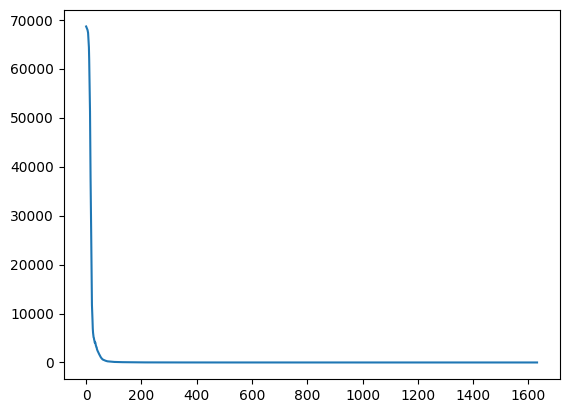

In [79]:
plt.plot(losses)